In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Plotting the number of iterations $T$ against the precision $\epsilon$

In [96]:
# Constants based on Assumptions
R_max = 1.0          # R_max > 0
gamma = 0.9          # discount factor, gamma < 1
V_max = R_max / (1 - gamma)  # V_max = R_max / (1 - gamma)
beta_bar = 1 / (1 - np.sqrt(gamma))  # beta_bar = 1 / (1 - sqrt(gamma))
n = 3000               # Number of state-action pairs
N = 51               # Number of discretely defined atoms
delta = 0.05         # Confidence level

In [97]:
# Define bounds functions
def hoeffding_bound(epsilon):
    C = np.log(2 * n * N / delta)
    kappa = np.sqrt(2 * V_max * gamma) * beta_bar
    tau = np.sqrt(V_max * C) * beta_bar
    numerator = (tau + np.sqrt(tau**2 + epsilon * kappa)) ** 2
    T = numerator / epsilon**2
    return T

def bernstein_bound(epsilon):
    A = np.sqrt(2 * V_max) * beta_bar
    D = np.sqrt(gamma) + (1/3) * np.log(n * N / delta)
    C = np.log(n * N / delta)
    term1 = A * (epsilon * D + A * C)
    term2 = A * np.sqrt(2 * epsilon * D * A * C + (2 * V_max * beta_bar**2 + (epsilon**2) / 9) * C**2)
    T = (term1 + term2) / epsilon**2
    return T

def bennett_bound(epsilon):
    kappa = np.sqrt(2 * V_max * gamma) * beta_bar
    tau = np.sqrt(V_max * np.log(n * N / delta)) * beta_bar
    numerator = (tau + np.sqrt(tau**2 + 4 * epsilon * kappa)) ** 2
    T = numerator / (4 * epsilon**2)
    return T

In [98]:
# Define range of epsilon values
epsilon_values = np.linspace(0.01, 0.05, 100)

T_hoeffding = [hoeffding_bound(eps) for eps in epsilon_values]
T_bernstein = [bernstein_bound(eps) for eps in epsilon_values]
T_bennett = [bennett_bound(eps) for eps in epsilon_values]

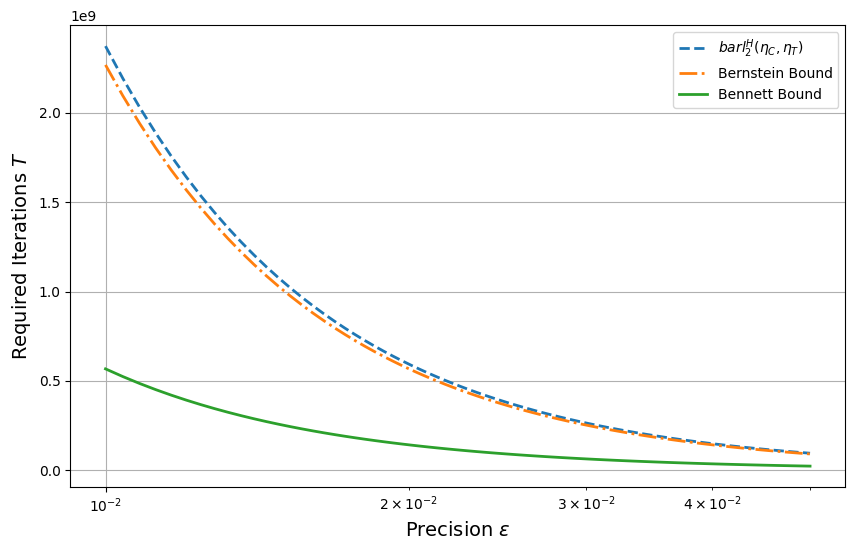

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, T_hoeffding, label='Hoeffding Bound', linestyle='--', linewidth=2)
plt.plot(epsilon_values, T_bernstein, label='Bernstein Bound', linestyle='-.', linewidth=2)
plt.plot(epsilon_values, T_bennett, label='Bennett Bound', linestyle='-', linewidth=2)

plt.xlabel('Precision $\epsilon$', fontsize=14)
plt.ylabel('Required Iterations $T$', fontsize=14)
plt.legend()
plt.xscale('log')
plt.yscale('linear')
plt.grid(True)

plt.savefig('Plots/iteration_vs_precision_log.png', dpi=300, bbox_inches='tight')

plt.show()

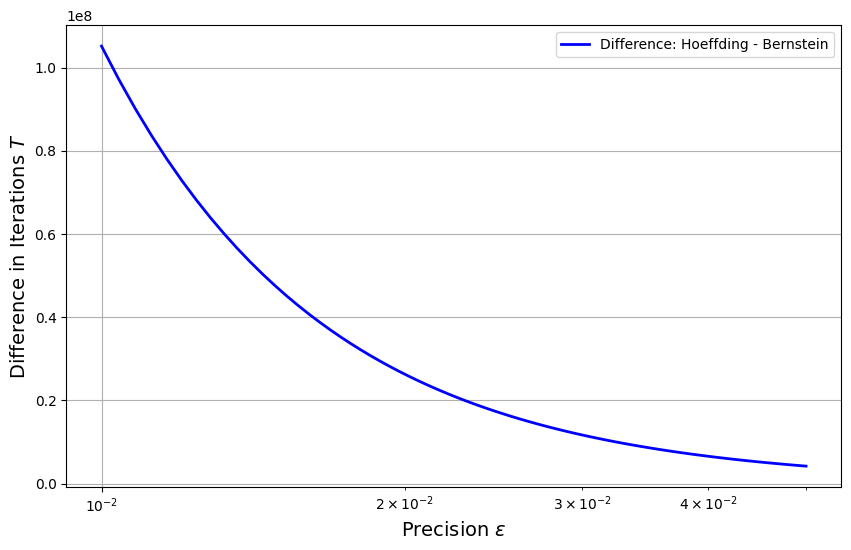

In [110]:
# Calculate the difference between Hoeffding and Bernstein bounds
difference = np.array(T_hoeffding) - np.array(T_bernstein)

# Plot the difference
plt.figure(figsize=(10, 6))

plt.plot(epsilon_values, difference, label='Difference: Hoeffding - Bernstein', linestyle='-', linewidth=2, color='blue')

plt.xlabel('Precision $\epsilon$', fontsize=14)
plt.ylabel('Difference in Iterations $T$', fontsize=14)
plt.xscale('log')
plt.yscale('linear')
plt.grid(True)
plt.legend()

plt.savefig('Plots/difference_hoeffding_bernstein_precision.png', dpi=300, bbox_inches='tight')
plt.show()

### Plotting the Number of Iterations $T$ against the Complexity of the Environment $n$

In [100]:
# Constants based on Assumptions
R_max = 1.0          # R_max > 0
gamma = 0.9          # discount factor, gamma < 1
V_max = R_max / (1 - gamma)  # V_max = R_max / (1 - gamma)
beta_bar = 1 / (1 - np.sqrt(gamma))  # beta_bar = 1 / (1 - sqrt(gamma))
N = 51               # Number of discretely defined atoms
delta = 0.05         # Confidence level
epsilon = 0.1

In [101]:
# Define bounds functions
def hoeffding_bound_n(n):
    C = np.log(2 * n * N / delta)
    kappa = np.sqrt(2 * V_max * gamma) * beta_bar
    tau = np.sqrt(V_max * C) * beta_bar
    numerator = (tau + np.sqrt(tau**2 + epsilon * kappa)) ** 2
    T = numerator / epsilon**2
    return T

def bernstein_bound_n(n):
    A = np.sqrt(2 * V_max) * beta_bar
    D = np.sqrt(gamma) + (1/3) * np.log(n * N / delta)
    C = np.log(n * N / delta)
    term1 = A * (epsilon * D + A * C)
    term2 = A * np.sqrt(2 * epsilon * D * A * C + (2 * V_max * beta_bar**2 + (epsilon**2) / 9) * C**2)
    T = (term1 + term2) / epsilon**2
    return T

def bennett_bound_n(n):
    kappa = np.sqrt(2 * V_max * gamma) * beta_bar
    tau = np.sqrt(V_max * np.log(n * N / delta)) * beta_bar
    numerator = (tau + np.sqrt(tau**2 + 4 * epsilon * kappa)) ** 2
    T = numerator / (4 * epsilon**2)
    return T

1000000.0


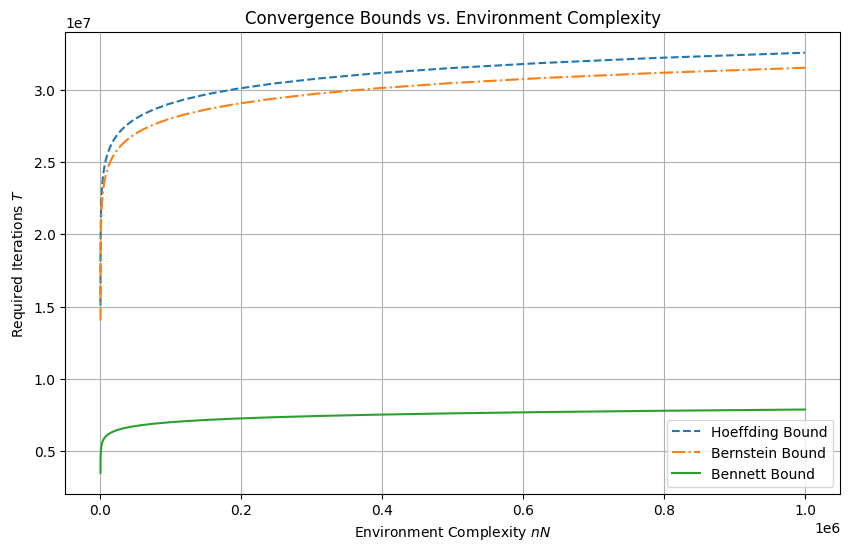

In [102]:
n_values = np.logspace(1, 6, num=50)  # From 10 to 1.000.000
T_hoeffding_nN = [hoeffding_bound_n(n) for n in n_values]
T_bernstein_nN = [bernstein_bound_n(n) for n in n_values]
T_bennett_nN = [bennett_bound_n(n) for n in n_values]

plt.figure(figsize=(10, 6))
plt.plot(n_values, T_hoeffding_nN, label='Hoeffding Bound', linestyle='--')
plt.plot(n_values, T_bernstein_nN, label='Bernstein Bound', linestyle='-.')
plt.plot(n_values, T_bennett_nN, label='Bennett Bound', linestyle='-')
plt.xlabel('Environment Complexity $nN$')
plt.ylabel('Required Iterations $T$')
plt.title('Convergence Bounds vs. Environment Complexity')
plt.legend()
plt.xscale('linear')
plt.yscale('linear')
plt.grid(True)
plt.show()

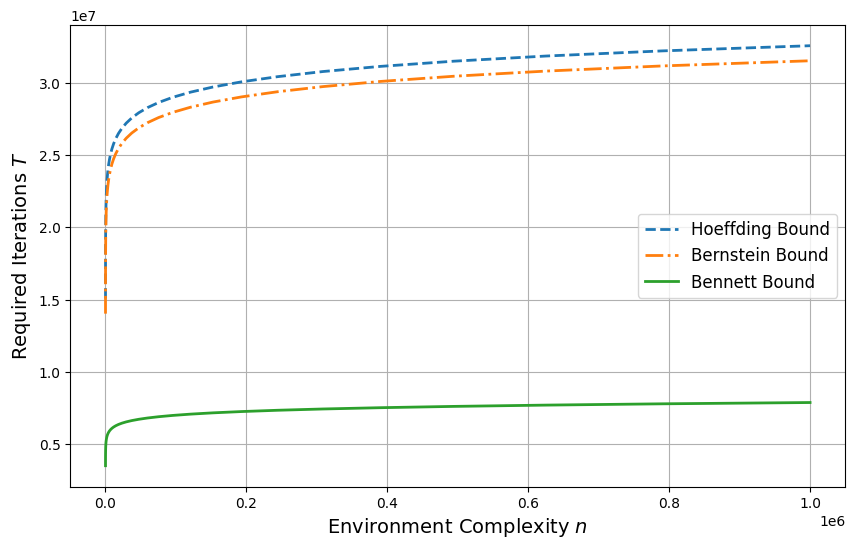

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(n_values, T_hoeffding_nN, label='Hoeffding Bound', linestyle='--', linewidth=2)
plt.plot(n_values, T_bernstein_nN, label='Bernstein Bound', linestyle='-.', linewidth=2)
plt.plot(n_values, T_bennett_nN, label='Bennett Bound', linestyle='-', linewidth=2)
plt.xlabel('Environment Complexity $n$', fontsize=14)
plt.ylabel('Required Iterations $T$',  fontsize=14)
plt.legend(fontsize=12)
plt.xscale('linear')
plt.yscale('linear')
plt.grid(True)

plt.savefig('Plots/iteration_vs_complexity.png', dpi=300, bbox_inches='tight')

plt.show()

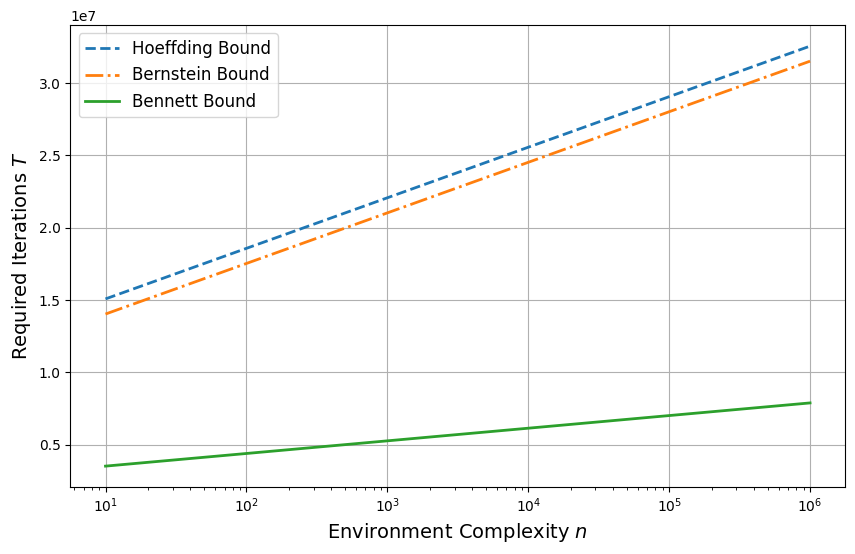

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(n_values, T_hoeffding_nN, label='Hoeffding Bound', linestyle='--', linewidth=2)
plt.plot(n_values, T_bernstein_nN, label='Bernstein Bound', linestyle='-.', linewidth=2)
plt.plot(n_values, T_bennett_nN, label='Bennett Bound', linestyle='-', linewidth=2)
plt.xlabel('Environment Complexity $n$', fontsize=14)
plt.ylabel('Required Iterations $T$',  fontsize=14)
plt.legend(fontsize=12)
plt.xscale('log')
plt.yscale('linear')
plt.grid(True)

plt.savefig('Plots/iteration_vs_complexity_log.png', dpi=300, bbox_inches='tight')

plt.show()